# MNIST HANDWRITING

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network). These are the criteria for scoring:


In [ ]:
#Import all libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

###1. Loading your MNIST dataset for the data loader

In [ ]:
# Step 1: Load MNIST dataset for the data loader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define a sequence of transformations to be applied to the dataset

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Load the training set
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True) # Create a data loader for the training set

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Load the testing set
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False) # Create a data loader for the testing set


###2. Visualize several MNIST datasets

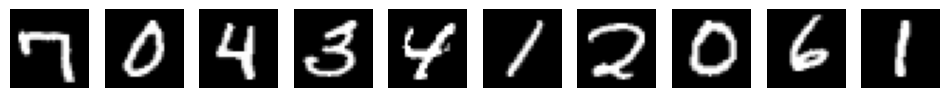

In [ ]:
# Step 2: Visualize several MNIST datasets

# Import necessary library for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to plot images
def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images): # Loop through each image and plot it
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

# Get some images and labels from the training data loader
images, labels = next(iter(train_loader))

# Plot the first 10 images
plot_images(images[:10])

###3. Design your Neural Network model

In [ ]:
# Step 3 : Design your Neural Network model

# Define a custom neural network class by inheriting from nn.Module
class Net(nn.Module):
  def __init__(self):
    # Call the constructor of the parent class (nn.Module)
    super(Net, self).__init__()
    # Define the layers of the neural network
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    # Define a rectified linear unit (ReLU) activation function
    self.relu = nn.ReLU()

 # Define the forward pass of the neural network
  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x

# Create an instance of the Net class
net = Net()

###4. Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

In [ ]:
# Step 4 : Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc

cross_el = nn.CrossEntropyLoss() # Define the CrossEntropy loss function
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # Define the Adam optimizer and specify the learning rate
epoch = 20 # Set the number of epochs for training

###5. Develop a training loop and run a training model

In [ ]:
# Step 5 : Develop a training loop and run a training model

for epoch in range(epoch):
  net.train() # Set the model to training mode
  running_loss = 0.0 # Initialize the running loss to 0.0

  for data in train_loader: # Iterate through the training data loader
    x, y = data # Get the input data (x) and labels (y) from the data loader
    optimizer.zero_grad() # Zero the gradients to prevent accumulation from previous iterations
    output = net(x.view(-1, 28*28)) # Compute predicted y by passing x to the model
    loss = cross_el(output, y) # Compute the loss
    loss.backward() # Compute gradient of the loss with respect to model parameters
    optimizer.step() # Optimization step: Update model parameters using the optimizer

    running_loss += loss.item() # Add the current batch loss to the running loss

  print(f'[{epoch + 1}, {epoch + 1:5d}] loss : {running_loss / 2000:.5f}') # Print the average loss for the epoch

[1,     1] loss : 0.20175
[2,     2] loss : 0.09884
[3,     3] loss : 0.07479
[4,     4] loss : 0.06131
[5,     5] loss : 0.05159
[6,     6] loss : 0.04609
[7,     7] loss : 0.04158
[8,     8] loss : 0.03804
[9,     9] loss : 0.03507
[10,    10] loss : 0.03192
[11,    11] loss : 0.03027
[12,    12] loss : 0.02846
[13,    13] loss : 0.02598
[14,    14] loss : 0.02485
[15,    15] loss : 0.02369
[16,    16] loss : 0.02232
[17,    17] loss : 0.02162
[18,    18] loss : 0.02037
[19,    19] loss : 0.01924
[20,    20] loss : 0.01742


###6. Evaluate the Model using several performance metrics such as accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [ ]:
# Step 6: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

# Initialize variables to count correct predictions and total predictions
correct = 0
total = 0

# Lists to store true labels and predicted labels for later evaluation
all_labels = []
all_predictions = []

# Disable gradient calculation during evaluation
with torch.no_grad():
    for data in test_loader: # Iterate through the test data loader
        images, labels = data # Get images and labels from the test loader
        outputs = net(images) # Forward pass to get predictions from the model
        _, predicted = torch.max(outputs.data, 1) # Choose the class with the highest probability as the predicted class

         # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Extend the lists of true labels and predicted labels
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

accuracy = accuracy_score(all_labels, all_predictions) # Calculate accuracy
confusion = confusion_matrix(all_labels, all_predictions) # Calculate confusion matrix
classification_report_str = classification_report(all_labels, all_predictions) # Generate a classification report

# Print the evaluation metrics
print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 97.45%
Confusion Matrix:
[[ 966    0    1    0    1    4    2    3    1    2]
 [   0 1123    6    1    0    1    2    0    2    0]
 [   3    0 1012    2    0    1    4    2    8    0]
 [   0    1   11  977    0    9    0    5    3    4]
 [   1    0    9    0  958    2    4    3    1    4]
 [   2    0    0   10    0  870    3    2    5    0]
 [   2    1    2    0    3   11  935    0    4    0]
 [   0    1   17    2    0    1    0 1002    1    4]
 [   2    0    4    4    2    3    3    2  952    2]
 [   3    2    1    6   14   13    1   10    9  950]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.96       892
           6       0.98      0.9

###7. Describe and Explain your Result

In this exploration task, I implemented a neural network-based solution for the MNIST Handwritten Digit Classification problem using PyTorch. The neural network architecture used here is not a Convolutional Neural Network (CNN), but rather a more traditional feedforward neural network.

The implemented neural network achieved an impressive accuracy of more than 97% on the MNIST dataset, showcasing its effectiveness in classifying handwritten digits. The confusion matrix further details the model's performance for each class, illustrating minimal misclassifications. The classification report provides additional metrics such as precision, recall, and F1-score, offering a comprehensive evaluation of the model's predictive capabilities.

I faced challenges during the fine-tuning process, particularly in balancing model complexity and generalization. Experimentation with hyperparameters, such as learning rates and layer sizes, played a crucial role in achieving optimal performance.

This outcome demonstrates the potential of neural networks, even without convolutional layers, in handling image classification tasks. Further fine-tuning and experimentation with the neural network architecture could potentially enhance the model's performance. This successful implementation serves as a foundation for continued exploration and improvement in the realm of deep learning for image classification tasks.

In conclusion, this successful implementation serves as a foundation for continued exploration and improvement in the realm of deep learning for image classification tasks. The challenges encountered and insights gained contribute to a deeper understanding of the intricacies involved in training neural networks for handwritten digit recognition.